<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Load-packages-and-related-objects" data-toc-modified-id="Load-packages-and-related-objects-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load packages and related objects</a></span></li></ul></li><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data preparation</a></span><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Feature-encoding" data-toc-modified-id="Feature-encoding-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Feature encoding</a></span></li><li><span><a href="#Split-dataset-$\mapsto$-train/test" data-toc-modified-id="Split-dataset-$\mapsto$-train/test-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Split dataset $\mapsto$ train/test</a></span></li></ul></li><li><span><a href="#Inspection-of-the-training-set" data-toc-modified-id="Inspection-of-the-training-set-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Inspection of the training set</a></span><ul class="toc-item"><li><span><a href="#Short-summary-of-training-set" data-toc-modified-id="Short-summary-of-training-set-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Short summary of training set</a></span></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Visualization</a></span></li></ul></li><li><span><a href="#Classification-with-KNN" data-toc-modified-id="Classification-with-KNN-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Classification with KNN</a></span><ul class="toc-item"><li><span><a href="#Classification-using-all-the-features" data-toc-modified-id="Classification-using-all-the-features-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Classification using all the features</a></span><ul class="toc-item"><li><span><a href="#Classification-errors" data-toc-modified-id="Classification-errors-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Classification errors</a></span></li><li><span><a href="#Confusion-matrix" data-toc-modified-id="Confusion-matrix-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Confusion matrix</a></span></li></ul></li><li><span><a href="#Classification-using-only-2-features" data-toc-modified-id="Classification-using-only-2-features-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Classification using only 2 features</a></span><ul class="toc-item"><li><span><a href="#Decision-boundary" data-toc-modified-id="Decision-boundary-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Decision boundary</a></span></li><li><span><a href="#Tune-the-$k$-parameter" data-toc-modified-id="Tune-the-$k$-parameter-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Tune the $k$ parameter</a></span><ul class="toc-item"><li><span><a href="#Manually" data-toc-modified-id="Manually-4.2.2.1"><span class="toc-item-num">4.2.2.1&nbsp;&nbsp;</span>Manually</a></span></li><li><span><a href="#Bonus:-with-sklearn-GridSearchCV" data-toc-modified-id="Bonus:-with-sklearn-GridSearchCV-4.2.2.2"><span class="toc-item-num">4.2.2.2&nbsp;&nbsp;</span>Bonus: with <code>sklearn</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html" target="_blank"><code>GridSearchCV</code></a></a></span></li></ul></li></ul></li></ul></li></ul></div>

# Introduction

This goal of this first TP is twofold:

- familiarize yourself with Python `pandas, seaborn, sklearn`
- practice the data analysis workflow
    - with the $k$-NN classifier on a toy example: the [`iris` flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set)
    - display a descision boundary
    - apply a simple receipe to tune the $k$ parameter


**You are expected to answer, comment and argument everything you do**

## Load packages and related objects

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# use pandas to play with dataset
import pandas as pd

# use seaborn to display data
import seaborn as sns

# sklearn is THE Machine Learning library
from sklearn.datasets import load_iris ### some training datasets are available in the library
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Algorithm of the day
from sklearn.neighbors import KNeighborsClassifier as KNN

# Data preparation

In this first phase you get a first contact with the data

- size
- name of features (potentially rename some of them)
- missing values (there are no missing values with `iris`)
- type of features
- number of classes

and then split it into train/test sets

## Load data

In [2]:
iris = load_iris() # load iris dataset from scikit-learn

What are the attributes of the `iris` object?

In [3]:
help(iris)
iris.feature_names

Help on Bunch in module sklearn.utils object:

class Bunch(builtins.dict)
 |  Bunch(**kwargs)
 |  
 |  Container object for datasets
 |  
 |  Dictionary-like object that exposes its keys as attributes.
 |  
 |  >>> b = Bunch(a=1, b=2)
 |  >>> b['b']
 |  2
 |  >>> b.b
 |  2
 |  >>> b.a = 3
 |  >>> b['a']
 |  3
 |  >>> b.c = 6
 |  >>> b['c']
 |  6
 |  
 |  Method resolution order:
 |      Bunch
 |      builtins.dict
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __dir__(self)
 |      Default dir() implementation.
 |  
 |  __getattr__(self, key)
 |  
 |  __init__(self, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __setattr__(self, key, value)
 |      Implement setattr(self, name, value).
 |  
 |  __setstate__(self, state)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Create `DataFrame`s:

- `X_data` from `iris.data`
- `y_data` from `iris.target`
    * 2 columns `'label'` (0,1,2) and `'specie'` ('setosa', 'versicolor', 'virginica'')
    * set the type of the `'specie'` column to '`category`'

In [22]:
X_data = pd.DataFrame(iris.data, columns=iris.feature_names)
y_data = pd.DataFrame(iris.target, columns=['label'])

y_data['specie'] = y_data.label.map(dict(enumerate(iris.target_names)))
y_data['specie'] = y_data['specie'].astype('category')

What is the size of the dataset?

Hint: use `.shape`

In [6]:
X_data.shape

(150, 4)

Display the first 10 rows of the dataset

Hint: use `.head()`

In [8]:
X_data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


What is the type of each feature and what do they correspond to?

In [12]:
X_data.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

What is the proportion of each class?

Counter({'setosa': 50, 'versicolor': 50, 'virginica': 50})


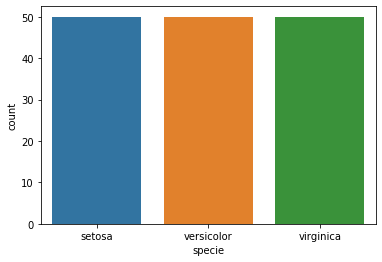

In [19]:
sns.countplot(y_data["specie"])

from collections import Counter
print(Counter(y_data["specie"]))

## Feature encoding

Try to rename features' name: remove `  (cm)` for simpler calls/display

In [23]:
X_data.rename(lambda x: '_'.join(x.split(' ')[:-1]),
              axis='columns', inplace=True)

X_data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Split dataset $\mapsto$ train/test

Hint:
- use `train_test_split`
- think about `shuffle` and `stratified` arguments!

After the split the test set is **only** used to assess the performance of your classifier on unseen data.

In [24]:
test_frac = 1/3 # Fraction of the data set to consider as test set

X_train, X_test,\
y_train, y_test = train_test_split(X_data, y_data.label,
                                   test_size=test_frac,
                                   shuffle=True,
                                   stratify=y_data.label)#,
#                                    random_state=123)

Comment on the impact of the `shuffle` and `stratified` arguments on the proportion of classes

Shuffle the data + respect the proportion of values in each class.

What could the `random_state` argument be used for? 

Reproducibility of experiments.

___

Create a `DataFrame` named `data_train` as the concatenation of `X_train` and the corresponding labels.

That will be convenient to use in the visualization part

In [26]:
data_train = pd.concat([X_train, y_data.specie[y_train.index]], axis=1)
data_train.head()

,sepal_length,sepal_width,petal_length,petal_width,specie
46,5.1,3.8,1.6,0.2,setosa
121,5.6,2.8,4.9,2.0,virginica
31,5.4,3.4,1.5,0.4,setosa
140,6.7,3.1,5.6,2.4,virginica
12,4.8,3.0,1.4,0.1,setosa


# Inspection of the training set

This is the most important part!

You must carefully study the distribution of your data.

For this purpose you are free to compute and display as many stastistical properties of the data and make some relevant comments.

## Short summary of training set

Hint: you can use the `describe` method

In [29]:
X_train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,100.00000,100.000000,100.000000,100.000000
mean,5.87200,3.055000,3.757000,1.187000
std,0.80855,0.462181,1.751205,0.756875
min,4.40000,2.000000,1.000000,0.100000
25%,5.10000,2.800000,1.575000,0.275000
50%,5.80000,3.000000,4.400000,1.300000
75%,6.40000,3.400000,5.100000,1.800000
max,7.90000,4.400000,6.700000,2.500000


Compute the correlation matrix

In [30]:
X_train.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.138285,0.866825,0.810489
sepal_width,-0.138285,1.000000,-0.456688,-0.390064
petal_length,0.866825,-0.456688,1.000000,0.958583
petal_width,0.810489,-0.390064,0.958583,1.000000


## Visualization

Enjoy [`seaborn`](https://seaborn.pydata.org/index.html) displays

- `boxplot`
- `violinplot`
- `pairplot`
- `pie`

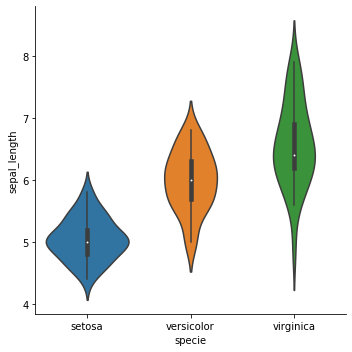

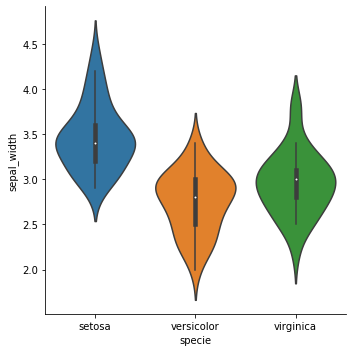

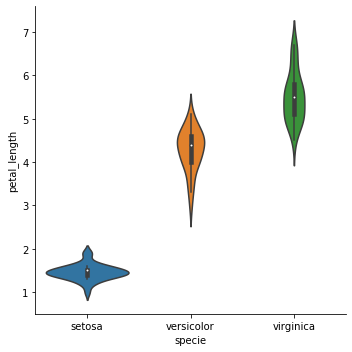

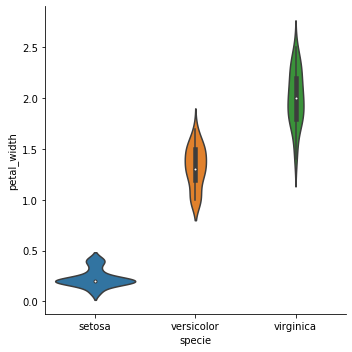

In [31]:
for feature in X_train.columns:
    sns.catplot(x='specie', y=feature,
                data=data_train,
                kind="violin")

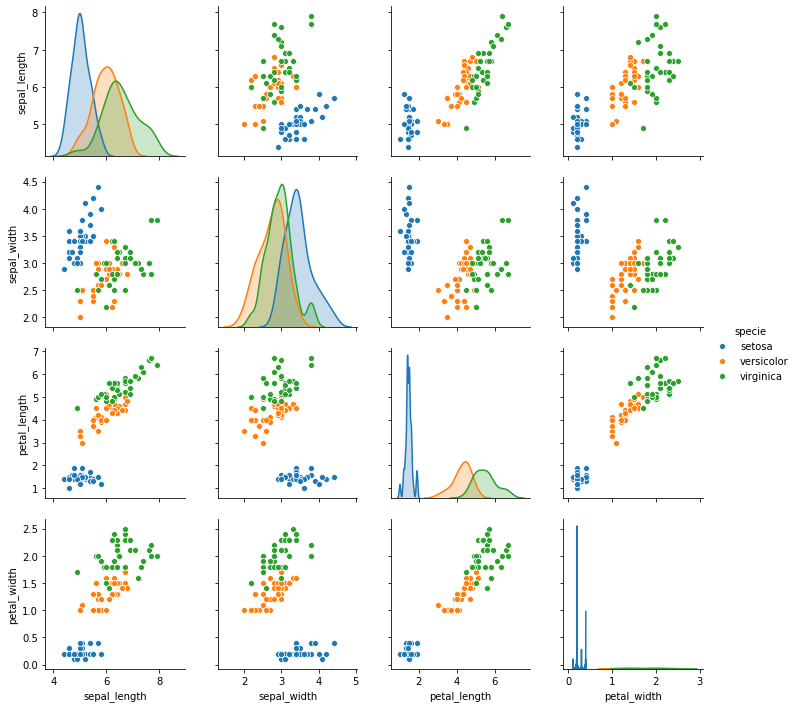

In [32]:
sns.pairplot(data_train, hue='specie')
plt.show()

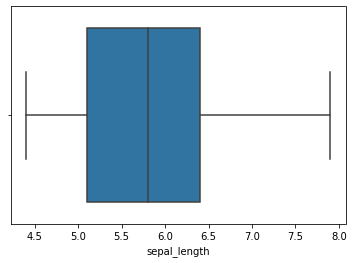

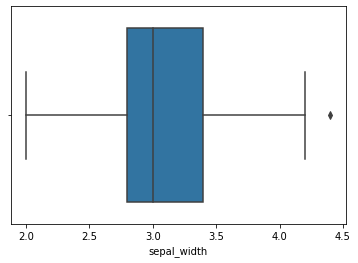

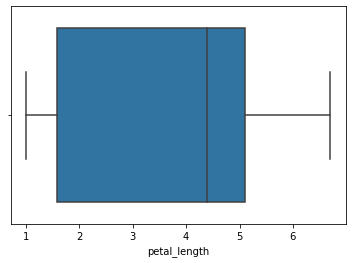

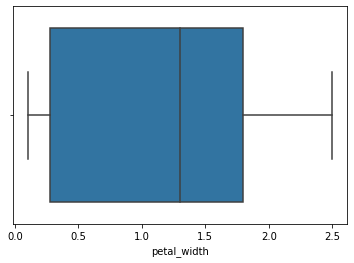

In [38]:
for x in X_train.columns:
    sns.boxplot(X_train[x])
    plt.show()

# Classification with KNN

## Classification using all the features

The `sklearn` classifier [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) works as a regular Python object! 

In particular it has 

- attributes:
    - `n_neighbors`$=k$
    - [`metric`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html)
    - `weights`
- methods
    - `.fit` to train the model
    - `.predict` to predict tests' label (specie)
    - `.score` to prodive classification score

Create a baseline $k$-NN classifier with $k=3$ and train the model on `X_train` and `y_train`

In [39]:
model = KNN(n_neighbors=3, metric='euclidean', weights='uniform')
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

### Classification errors

Compute the classification error on the training set `X_train` in 2 ways:

- use `predict` method
- use `score` method

In [44]:
print("The score method computes the accuracy: %f" %model.score(X_train, y_train))
y_pred_train = model.predict(X_train)
print("This method is more manual: %f" %np.mean(y_pred_train == y_train))

The score method computes the accuracy: 0.960000
This method is more manual: 0.960000


Now evaluate your model on the test set and give the corresponding classification error, `err_test`

In [55]:
y_pred_test = model.predict(X_test)
err_test = 1-model.score(X_test, y_test)
print("We compute the test error using the score function: %f" % err_test)

We compute the test error using the score function: 0.040000


### Confusion matrix

Use the function `confusion_matrix` to compute the confusion matrix called `conf_mat`of the classifier on the test set.

In [56]:
conf_mat = confusion_matrix(y_test, y_pred_test)

To display a nice confusion matrix you can use the following

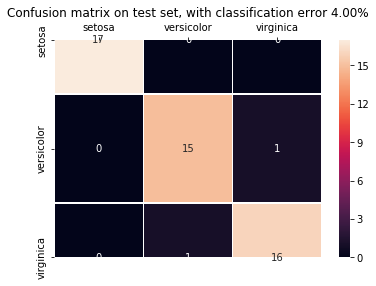

In [57]:
plt.title('Confusion matrix on test set, with classification error {:.2f}%'.format(100*err_test))

ax = sns.heatmap(conf_mat, annot=True, linewidths=.5)

ax.xaxis.set_ticks_position('top')
plt.xticks(0.5+np.arange(3), iris.target_names)
plt.yticks(0.5+np.arange(3), iris.target_names, **{'verticalalignment':'center'})

plt.show()

Any comment?

Pretty nice, isn't it?
We make 100% of accurate prediction on the first category. This is expected as the data of the first category well clearly well separated from the others in our pair plots. The predictions on the other classes are also quite good.

## Classification using only 2 features

From the visualization part what could be the best 2 discriminative features?

Create `X_train_2D` the corresponding 2D training set.

In [58]:
features = ['petal_length', 'petal_width'] # petal_width, sepal_length

X_train_2D = X_train[features]

Train a baseline $k$-NN classifier based only on these 2 features, with $k=3$

In [66]:
model2 = KNN(n_neighbors=3)
model2.fit(X_train_2D, y_train)

print(model2.score(X_train_2D, y_train))
print(model2.score(X_test[features], y_test))

0.98
0.96


### Decision boundary

To do this, you can mesh the input space and predict the class of each point of the mesh

To construct the mesh you can use

In [60]:
x_min, x_max = X_data[features[0]].min() - 1.0, X_data[features[0]].max() + 1.0
y_min, y_max = X_data[features[1]].min() - 1.0, X_data[features[1]].max() + 1.0

# Create mesh of the input space
nx, ny = 100, 100 # number of nodes along x (resp. y) axis
mesh_x, mesh_y = np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny)
xx, yy = np.meshgrid(mesh_x, mesh_y)
X_mesh = np.column_stack([xx.ravel(), yy.ravel()])

Predict labels of the mesh's nodes

In [70]:
y_pred_mesh = model2.predict(X_mesh)

To display the decision boundary you can use `contourf` in the following way

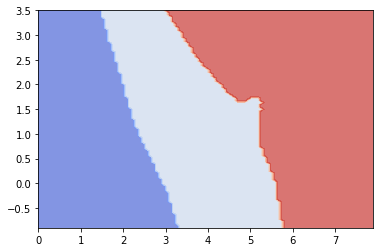

In [71]:
fig, ax = plt.subplots()

ax.contourf(xx, yy, y_pred_mesh.reshape(xx.shape),
            cmap=plt.cm.coolwarm, alpha=0.7)

plt.show()

Now **you** can display both the decision boundary and train/test examples

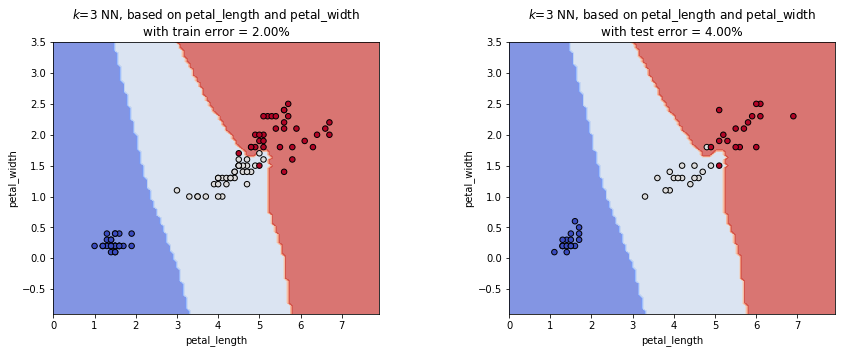

In [75]:
n_neigh = 3
# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

title_main = r'$k$={} NN, based on {}'.format(n_neigh, ' and '.join(features))

data_types = ['train', 'test']
datas = [(X_train, y_train), (X_test, y_test)]

for dat, dat_typ, ax in zip(datas, data_types, axes.ravel()):
    
    X, y = dat
    err_sc = 100*(1.0-model2.score(X[features], y))
    tit_sub = 'with {} error = {:.2f}%'.format(dat_typ, err_sc)
    
    ax.set_title('\n'.join([title_main, tit_sub]))
    # Decision boundary
    ax.contourf(xx, yy, y_pred_mesh.reshape(xx.shape),
                cmap=plt.cm.coolwarm, alpha=0.7)

    # Plot also the training/test points
    ax.scatter(X[features[0]], X[features[1]], c=y, 
               cmap=plt.cm.coolwarm, edgecolor='k', s=30)

    ax.set_xlabel(features[0]); ax.set_xlim(xx.min(), xx.max())
    ax.set_ylabel(features[1]); ax.set_ylim(yy.min(), yy.max())

plt.show()

### Tune the $k$ parameter

#### Manually

Split the 2D training set into a smaller dataset and one validation set.

The latter is used as an indicator of the predicting power of $k$-NN classifier on the test set for different values of $k$.

In other words

- `X_train_2D, y_train` $\mapsto$ `X_train_small` $\cup$ `X_valid`, `y_valid` $\cup$ `y_train_small`
- Fit the model for different values of $k$ and predict on the validation set
- Pick the value of $k$ that yields the smallest validation error

In [76]:
test_frac = 1/3 # Fraction of the data set to consider as validation set

X_train_small, X_valid,\
y_train_small, y_valid = train_test_split(X_train_2D, y_train,test_size=test_frac)

In [77]:
n_neigh = 5
knn = KNN(n_neighbors=n_neigh, metric='euclidean', weights='uniform')

knn.fit(X_train_small, y_train_small)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [78]:
range_neigh = np.arange(1, 30)

err_train_small = np.zeros(range_neigh.shape)
err_valid = np.zeros(range_neigh.shape)

for it, k in enumerate(range_neigh):
    knn.n_neighbors = k # set the nb of neighbors to consider
    
    knn.fit(X_train_small, y_train_small)
    err_train_small[it] = 1-knn.score(X_train_small, y_train_small)
    err_valid[it] = 1-knn.score(X_valid, y_valid)

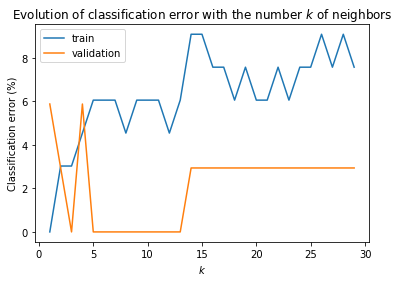

In [79]:
plt.title('Evolution of classification error with the number $k$ of neighbors')

sns.lineplot(x=range_neigh, y=100*err_train_small, label='train')
sns.lineplot(x=range_neigh, y=100*err_valid, label='validation')

plt.xlabel(r'$k$')
plt.ylabel('Classification error (%)')

plt.show()

In [85]:
knn.n_neighbors = 5

In [86]:
knn.fit(X_train[features], y_train)
print('Test error',100*(1-knn.score(X_test[features], y_test)))

Test error 4.0000000000000036


#### Bonus: with `sklearn` [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
nb_folds = 5
grid = {'n_neighbors': np.arange(1, 20),
        'weights': ['uniform', 'distance']}
knn_gs = GridSearchCV(estimator=KNN(metric='euclidean'),
                           param_grid=grid,
                           cv=nb_folds,
                           return_train_score=True,
                           scoring='accuracy')

# features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
features = ['petal_length', 'sepal_width']

# train the classifier with the best values found by cross validation
knn_gs.fit(X_train[features], y_train)

/home/dbaudry/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='euclidean',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [89]:
print(knn_gs.best_params_)

{'n_neighbors': 16, 'weights': 'uniform'}


In [90]:
knn_best = knn_gs.best_estimator_
knn_best.fit(X_train[features], y_train)
print("the test error is", 1-knn_best.score(X_test[features], y_test))

the test error is 0.020000000000000018


Inside the `knn_gs` object, one can retrieve all kind of informations about how the cross-validation went. Especially, one can use that information to plot the validation error as a function of the parameter k.

[{'n_neighbors': 1, 'weights': 'uniform'}, {'n_neighbors': 1, 'weights': 'distance'}, {'n_neighbors': 2, 'weights': 'uniform'}, {'n_neighbors': 2, 'weights': 'distance'}, {'n_neighbors': 3, 'weights': 'uniform'}, {'n_neighbors': 3, 'weights': 'distance'}, {'n_neighbors': 4, 'weights': 'uniform'}, {'n_neighbors': 4, 'weights': 'distance'}, {'n_neighbors': 5, 'weights': 'uniform'}, {'n_neighbors': 5, 'weights': 'distance'}, {'n_neighbors': 6, 'weights': 'uniform'}, {'n_neighbors': 6, 'weights': 'distance'}, {'n_neighbors': 7, 'weights': 'uniform'}, {'n_neighbors': 7, 'weights': 'distance'}, {'n_neighbors': 8, 'weights': 'uniform'}, {'n_neighbors': 8, 'weights': 'distance'}, {'n_neighbors': 9, 'weights': 'uniform'}, {'n_neighbors': 9, 'weights': 'distance'}, {'n_neighbors': 10, 'weights': 'uniform'}, {'n_neighbors': 10, 'weights': 'distance'}, {'n_neighbors': 11, 'weights': 'uniform'}, {'n_neighbors': 11, 'weights': 'distance'}, {'n_neighbors': 12, 'weights': 'uniform'}, {'n_neighbors': 1

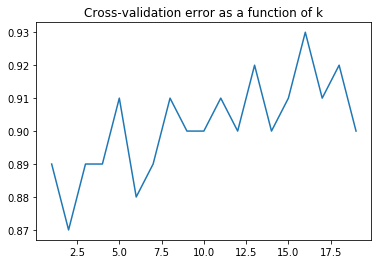

In [91]:
# all the combinations of the parameter tried 
params_gs = knn_gs.cv_results_['params']
print(params_gs)

# retrieve the cross-validation error for all the parameters 
test_gs = knn_gs.cv_results_['mean_test_score']
print(test_gs)

# for the choice of "uniform", first retrieve the corresponding indices
ind_unif = [i for i, par in enumerate(params_gs) if par['weights']=='uniform']

k_range = grid['n_neighbors']

plt.title('Cross-validation error as a function of k')
plt.plot(k_range, test_gs[ind_unif])
plt.show()